# Preparation

In [1]:
# Import functions first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, cv2, json
from sklearn.metrics import accuracy_score

In [2]:
# Define the file directory location
base_dir = "../input/cassava-leaf-disease-classification"

In [3]:
# Acquire explanatory data analysis (EDA) features of the mapping
with open(os.path.join(base_dir, "label_num_to_disease_map.json")) as file:
    map_classes = json.loads(file.read())
    map_classes = {int(k) : v for k, v in map_classes.items()}

print(json.dumps(map_classes, indent=4))

{
    "0": "Cassava Bacterial Blight (CBB)",
    "1": "Cassava Brown Streak Disease (CBSD)",
    "2": "Cassava Green Mottle (CGM)",
    "3": "Cassava Mosaic Disease (CMD)",
    "4": "Healthy"
}


In [4]:
# Show number of train images
input_files = os.listdir(os.path.join(base_dir, "train_images"))
print(f"Number of train images: {len(input_files)}")

Number of train images: 21397


In [5]:
# Show the image resolution
img_shapes = {}

for image_name in os.listdir(os.path.join(base_dir, "train_images"))[:300]:
    image = cv2.imread(os.path.join(base_dir, "train_images", image_name))
    img_shapes[image.shape] = img_shapes.get(image.shape, 0) + 1

print(img_shapes)

{(600, 800, 3): 300}


# Image classification

In [6]:
# Load the training DataFrame
df_train = pd.read_csv(os.path.join(base_dir, "train.csv"))
df_train["class_name"] = df_train["label"].map(map_classes)

df_train

,image_id,label,class_name
0,1000015157.jpg,0,Cassava Bacterial Blight (CBB)
1,1000201771.jpg,3,Cassava Mosaic Disease (CMD)
2,100042118.jpg,1,Cassava Brown Streak Disease (CBSD)
3,1000723321.jpg,1,Cassava Brown Streak Disease (CBSD)
4,1000812911.jpg,3,Cassava Mosaic Disease (CMD)
...,...,...,...
21392,999068805.jpg,3,Cassava Mosaic Disease (CMD)
21393,999329392.jpg,3,Cassava Mosaic Disease (CMD)
21394,999474432.jpg,1,Cassava Brown Streak Disease (CBSD)
21395,999616605.jpg,4,Healthy


<Axes: xlabel='count', ylabel='class_name'>

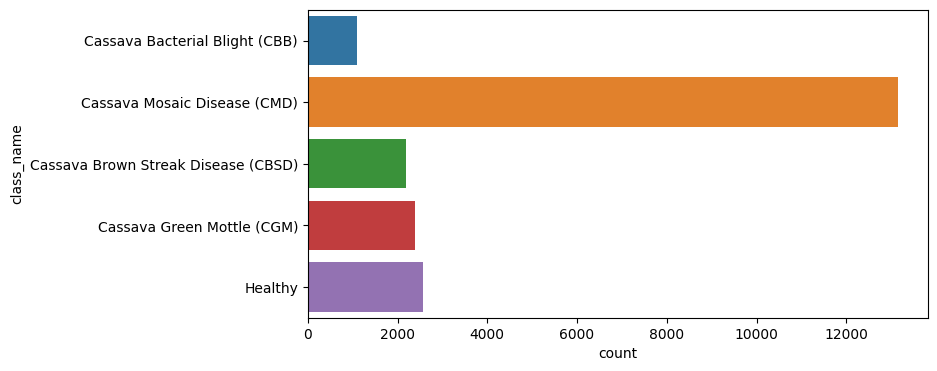

In [7]:
# Show class counts along with images
plt.figure(figsize=(8, 4))
sns.countplot(y="class_name", data=df_train)

# Create a submission

In [8]:
# Generate the submission template
df_sub = pd.read_csv("../input/cassava-leaf-disease-classification/sample_submission.csv", index_col=0)

df_sub

,label
image_id,
2216849948.jpg,4


In [9]:
# Show one of the test images file name
os.listdir(os.path.join(base_dir, "test_images"))

['2216849948.jpg']

In [10]:
# Compute the accuracy rating
for pred_class in range(0, 5):
    y_true = df_train["label"].values
    y_pred = np.full_like(y_true, pred_class)
    print(f"Accuracy score (predict {pred_class}): {accuracy_score(y_true, y_pred):.3f}")

Accuracy score (predict 0): 0.051
Accuracy score (predict 1): 0.102
Accuracy score (predict 2): 0.112
Accuracy score (predict 3): 0.615
Accuracy score (predict 4): 0.120


In [11]:
# Assign label
df_sub["label"] = 3

# Save as CSV submission file
df_sub.to_csv("submission.csv")
print("Successfully saved as CSV file")

Successfully saved as CSV file
